In [1]:
import tmdbsimple as tmdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import classes.database as db

tmdb.API_KEY = "60dde32875c0d3c5679496aba9fb3465"
tmdb.REQUESTS_TIMEOUT = 10


In [4]:
import datetime
import tqdm

df = pd.DataFrame()

day = str(datetime.datetime.now().day - 1).zfill(2)
month = str(datetime.datetime.now().month).zfill(2)
year = str(datetime.datetime.now().year).zfill(4)

URL = f"http://files.tmdb.org/p/exports/movie_ids_{month}_{day}_{year}.json.gz"
dfidlist = pd.read_json(URL, compression="gzip", lines=True)


for i in tqdm.notebook.tqdm(dfidlist["id"].head(100), total=100):
    movie = tmdb.Movies(i)
    response = movie.info()
    tempdf = pd.DataFrame(
        [
            [
                movie.title,
                movie.budget,
                movie.genres,
                movie.original_language,
                movie.original_title,
                movie.popularity,
                movie.production_companies,
                movie.production_countries,
                movie.release_date,
                movie.revenue,
                movie.runtime,
                movie.spoken_languages,
                movie.status,
                movie.vote_average,
                movie.vote_count,
                movie.adult,
            ]
        ],
        columns=[
            "title",
            "budget",
            "genres",
            "original_language",
            "original_title",
            "popularity",
            "production_companies",
            "production_countries",
            "release_date",
            "revenue",
            "runtime",
            "spoken_languages",
            "status",
            "vote_average",
            "vote_count",
            "adult",
        ],
    )
    df = pd.concat([df, tempdf], ignore_index=True)

df.to_csv("moviesfull.csv", index=False)

  0%|          | 0/100 [00:00<?, ?it/s]

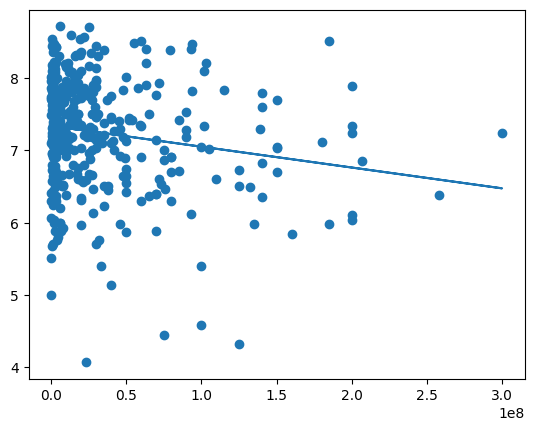

In [3]:

x = df['Budget']
y = df['Rating']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

In [4]:
#figuring out how to get put current date for URL
import datetime

day = str(datetime.datetime.now().day-1).zfill(2)
month = str(datetime.datetime.now().month).zfill(2)
year = str(datetime.datetime.now().year).zfill(4)

URL = f"http://files.tmdb.org/p/exports/movie_ids_{month}_{day}_{year}.json.gz"

print(URL)

http://files.tmdb.org/p/exports/movie_ids_05_17_2023.json.gz


In [12]:
import datetime
from tqdm import tqdm

df = pd.DataFrame()

day = str(datetime.datetime.now().day-1).zfill(2)
month = str(datetime.datetime.now().month).zfill(2)
year = str(datetime.datetime.now().year).zfill(4)

URL = f"http://files.tmdb.org/p/exports/movie_ids_{month}_{day}_{year}.json.gz"
dfidlist = pd.read_json(URL, compression="gzip", lines=True)

print(dfidlist.shape[0])

805194


In [1]:
#clenaup of csv

import pandas as pd
import numpy as np
import classes.datamanip as dm

df = pd.read_csv("movies10k.csv")
"""
df["budget"] = df["budget"].replace(0, np.nan)
df["revenue"] = df["revenue"].replace(0, np.nan)
df["vote_average"] = df["vote_average"].replace(0, np.nan)
df["vote_count"] = df["vote_count"].replace(0,np.nan)
df["genres"] = df["genres"].apply(dm.extractDict)
df["production_companies"] = df["production_companies"].apply(dm.extractDict)
df["spoken_languages"] = df["spoken_languages"].apply(dm.extractDict)
"""

cleandf = dm.cleanup(df)

cleandf.head()


,title,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,adult
0,Blondie,NaN,[Comedy],en,Blondie,3.352,[Columbia Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",1938-11-30,NaN,70,"[English, English]",Released,7.214,7.0,False
1,"Peter Voss, Thief of Millions",NaN,[Adventure],de,Der Mann ohne Namen,0.606,None,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1921-01-01,NaN,420,None,Released,NaN,NaN,False
2,Love at Twenty,NaN,"[Drama, Romance]",fr,L'Amour à vingt ans,3.047,"[Ulysse Productions, Unitec Films, Cinesecolo,...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1962-06-22,NaN,110,"[Italian, Italiano, Japanese, 日本語, Polish, Pol...",Released,6.700,41.0,False
3,New World Disorder 9: Never Enough,NaN,None,en,New World Disorder 9: Never Enough,1.818,None,[],2008-12-08,NaN,69,"[English, English]",Released,6.000,3.0,False
4,Sesame Street: Elmo Loves You!,NaN,[Family],en,Sesame Street: Elmo Loves You!,0.600,None,[],2010-01-05,NaN,46,None,Released,NaN,NaN,False


In [9]:
import pandas as pd
import classes.datamanip as dm
import ast

df = pd.read_csv("movies10k.csv")

def extractDict(input):
    outputList = []
    tempList = []
    input = str(input).replace("[","")
    input = str(input).replace("]","")
    if input == "":
        return 
    dictentry = input
    input = ast.literal_eval(dictentry)
    if type(input) == tuple:
        for i in input:
          tempList = i.items()
          for x in tempList:
            if "english_name" in x:
                outputList.append(x[1])
            elif "name" in x:
                outputList.append(x[1])
    else:
        tempList = input.items()
        for x in tempList:
            if "english_name" in x:
                outputList.append(x[1])
            elif "name" in x:
                outputList.append(x[1])
    return outputList


print(extractDict(df["production_countries"][456]))

['United States of America']


In [1]:
#testing upload

import classes.database as db
import classes.datamanip as dm
import pandas as pd 

df = pd.read_csv("movies10k.csv")
df = dm.cleanup(df)

db.connect()
db.dropMoviesTable()
db.createMoviesTable()
db.uploadMovieData(df)
db.shutdown()

Table dropped
Table created
Data uploaded
PostgreSQL connection is closed


In [1]:
#testing get from db
import classes.database as db
import pandas as pd

df_from_db = pd.DataFrame()

db.connect()
df_from_db = db.getMovieData()
db.shutdown()

df_from_db.head()

Data downloaded
PostgreSQL connection is closed


,id,title,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,adult
0,1,Blondie,NaN,{Comedy},en,Blondie,3.352,"{""Columbia Pictures""}","{""United States of America""}",1938-11-30,NaN,70,"{English,English}",Released,7.214,7.0,False
1,2,"Peter Voss, Thief of Millions",NaN,{Adventure},de,Der Mann ohne Namen,0.606,None,{Germany},1921-01-01,NaN,420,None,Released,NaN,NaN,False
2,3,Love at Twenty,NaN,"{Drama,Romance}",fr,L'Amour à vingt ans,3.047,"{""Ulysse Productions"",""Unitec Films"",Cinesecol...","{Germany,France,Italy,Japan,Poland}",1962-06-22,NaN,110,"{Italian,Italiano,Japanese,日本語,Polish,Polski,F...",Released,6.700,41.0,False
3,4,New World Disorder 9: Never Enough,NaN,None,en,New World Disorder 9: Never Enough,1.818,None,None,2008-12-08,NaN,69,"{English,English}",Released,6.000,3.0,False
4,5,Sesame Street: Elmo Loves You!,NaN,{Family},en,Sesame Street: Elmo Loves You!,0.600,None,None,2010-01-05,NaN,46,None,Released,NaN,NaN,False


In [2]:
import classes.database as db
db.shutdown()

PostgreSQL connection is closed
